Iris Dataset

This is the classic dataset used for predicting Iris flowers. I'd like to use K Nearest Neighbors to build a model to classify what type of iris a data point is given information. Then I'd also like to try again with a Linear Regression model and compare the accuracy of results.

In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [122]:
iris_data = pd.read_csv("Iris.csv")
print(iris_data.iloc[60])
#print(iris_data)

Id                            61
SepalLengthCm                  5
SepalWidthCm                   2
PetalLengthCm                3.5
PetalWidthCm                   1
Species          Iris-versicolor
Name: 60, dtype: object


In [123]:
#Number of rows and number of columns
iris_data.shape

(150, 6)

In [124]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [126]:
#Looking at number of rows for each species
iris_data.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [127]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris_data[feature_columns].values
y = iris_data['Species'].values

In [128]:
# Since labels are categorical, we need to use Label Encoder to transform them into numbers. In this case 0-2
le = LabelEncoder()
y = le.fit_transform(y)

In [129]:
#Spliting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [130]:
# Instantiate learning model
classifier = KNeighborsClassifier(n_neighbors = 3)

# Fitting model
classifier.fit(X_train, y_train)

# Predicting the test set result
y_prediction = classifier.predict(X_test)

In [131]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [132]:
accuracy = accuracy_score(y_test, y_prediction)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [115]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

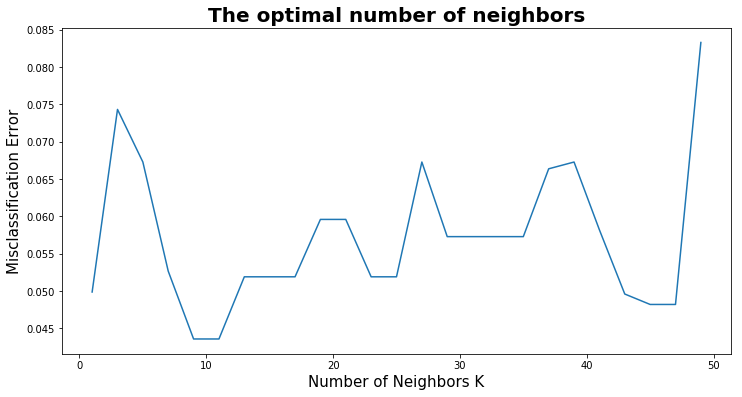

In [116]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(12,6))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_list, MSE)

plt.show()


In [117]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


Now that we know that the optimal number of neighbors to include is 9, lets retrain the model for maximum accuracy

In [133]:
classifier = KNeighborsClassifier(n_neighbors = 9)

# Fitting model
classifier.fit(X_train, y_train)

# Predicting the test set result
y_prediction = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [134]:
def predict_iris_type(X_values):  
    answer = classifier.predict(X_values)
    answer = le.inverse_transform(answer)
    return answer[0]

# Expected results should be Iris-setosa
prediction1 = predict_iris_type([[5.1, 3.5, 1.4, 0.2]])

# Expected results should be Iris-versicolor
prediction2 = predict_iris_type([[5, 2, 3.5, 1]])

# Expected results should be Iris-virginica 
prediction3 = predict_iris_type([[5.9, 3.0, 5.1, 1.8]])

print('Prediction 1:', prediction1)
print('Prediction 2:', prediction2)
print('Prediction 3:', prediction3)

Prediction 1: Iris-setosa
Prediction 2: Iris-versicolor
Prediction 3: Iris-virginica
